In [1]:
import pandas as pd
import numpy as np

np.random.seed(42)

raw_police_data = pd.read_csv('police_data/crimes_2012_to_2017.csv')

raw_police_data


,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456709,6250330,10508679,HZ250507,05/03/2016 11:33:00 PM,026XX W 23RD PL,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,28.0,30.0,08B,1159105.0,1888300.0,2016,05/10/2016 03:56:50 PM,41.849222,-87.691556,"(41.849222028, -87.69155551)"
1456710,6251089,10508680,HZ250491,05/03/2016 11:30:00 PM,073XX S HARVARD AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,True,...,17.0,69.0,14,1175230.0,1856183.0,2016,05/10/2016 03:56:50 PM,41.760744,-87.633335,"(41.760743949, -87.63333531)"
1456711,6251349,10508681,HZ250479,05/03/2016 12:15:00 AM,024XX W 63RD ST,041A,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,...,15.0,66.0,04B,1161027.0,1862810.0,2016,05/10/2016 03:56:50 PM,41.779235,-87.685207,"(41.779234743, -87.685207125)"
1456712,6253257,10508690,HZ250370,05/03/2016 09:07:00 PM,082XX S EXCHANGE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,...,7.0,46.0,08B,1197261.0,1850727.0,2016,05/10/2016 03:56:50 PM,41.745252,-87.552773,"(41.745251975, -87.552773464)"


# Raw Data
 - We can see that the raw data has a lot of information which to some extend is not really necessary.
 - For example the first column does not provide any meaning. The 'ID', 'Case Number' are also something that we do not
   need for further analysis so we can remove them.


In [2]:
raw_police_data = raw_police_data.loc[:, ~raw_police_data.columns.str.contains('^Unnamed')]
raw_police_data = raw_police_data.drop(columns=['Case Number', 'ID'])
raw_police_data.head()

,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1022,10.0,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,313,3.0,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,1524,15.0,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,False,1532,15.0,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,1523,15.0,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [3]:
raw_police_data = raw_police_data.drop(columns=[
    'IUCR','Block', 'Description', 'Location Description', 'Beat', 'Ward', 'Community Area', 'FBI Code', 'Location'])



In [4]:
# The dataset has 1_456_714 data entries lets remove  the null values to see how much will it shrink

raw_police_data = raw_police_data.dropna()

# The result is 1_419_630


In [5]:
# Lets examine the amount of crimes for each year
years = ['2012', '2013', '2014', '2015', '2016']
year_2012 = raw_police_data[raw_police_data["Year"] == 2012]

each_year_crimes = {}
crimes = {}

for year in years:
    each_year_crimes[year] = raw_police_data[raw_police_data["Year"] == int(year)]
    # get the amount of crimes for each year
    crimes[year] = len(each_year_crimes[year].index)


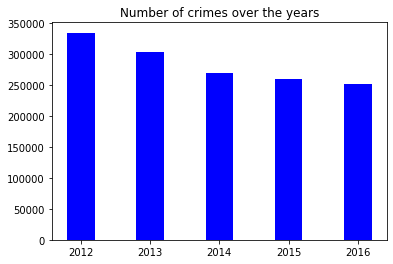

In [6]:
# Plot the amount of crimes for each year in a histogram

import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

years = list(crimes.keys())
counts = list(crimes.values())

plt.bar(years, counts, color ='blue',width = 0.4)
plt.title("Number of crimes over the years")
plt.show()


### We can see that the number of crimes over the years is descending based on the reported cases in the datase

In [7]:
# Lets see how the crime is influenced for each month
from datetime import datetime

def time_convert(date_time):
    s1 = date_time[:11]
    s2 = date_time[11:]
    
    month = s1[:2]
    date = s1[3:5]
    year = s1[6:10]
    
    hr = s2[:2]
    mins = s2[3:5]
    sec = s2[6:8]
    time_frame = s2[9:]
    if(time_frame == 'PM'):
        if (int(hr) != 12):
            hr = str(int(hr) + 12)
    else:
        if(int(hr) == 12):
            hr = '00'
    
    final_date = datetime(int(year), int(month), int(date), int(hr), int(mins), int(sec))
    return final_date



# Using apply() of pandas to apply time_convert on every row of the Date column
raw_police_data['Date'] = raw_police_data['Date'].apply(time_convert)

def month(x):
    return x.strftime("%-m")

police_data_with_month = raw_police_data

police_data_with_month['Month'] = police_data_with_month['Date'].apply(month)

In [8]:
months = [1,2,3,4,5,6,7,8,9,10,11,12]
crimes_for_each_month = {
    '2012': [],
    '2013': [],
    '2014': [],
    '2015': [],
    '2016': [],
}

# each_year_crimes[year] = raw_police_data[raw_police_data["Year"] == int(year)]
# crimes[year] = len(each_year_crimes[year].index)

for year in years:
    crimes_year = raw_police_data[raw_police_data["Year"] == int(year)]
    for month in months:
        crimes_month = crimes_year[crimes_year["Month"] == str(month)]
        crimes_for_each_month[year].append(len(crimes_month.index))


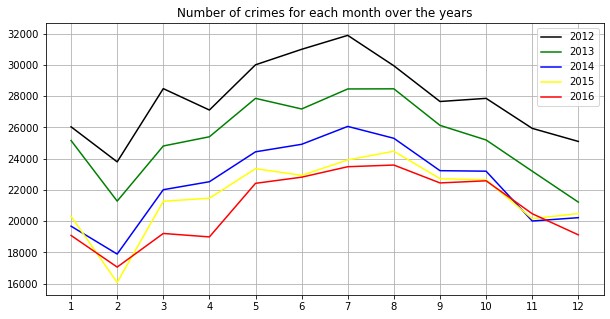

In [9]:
# Plot all crimes for each month from year 2012 to 2016
year_colors = {'2012': 'black', '2013':'green', '2014':'blue', '2015':'yellow', '2016':'red'}

barWidth = 0.2

br1 = [1,2,3,4,5,6,7,8,9,10,11,12]
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

plt.rcParams["figure.figsize"] = (10,5)

for year in crimes_for_each_month:
    months = [1,2,3,4,5,6,7,8,9,10,11,12]
    counts = list(crimes_for_each_month[year])

    plt.plot(br1, counts, color=year_colors[year], label=year)
    plt.title("Number of crimes for each month over the years")
    plt.legend()
    plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
    plt.grid()

plt.show()





In [10]:
import time

# Here we convert the Date, to a Unix Timestamp, we skip the hours/mins/seconds
# so we round up and store the timestamp of the day only

def convert_to_daily_timestamp(x):
    # ts = pd.Timestamp(x)
    # ts = ts.normalize()
    x = x.strftime("%m/%d/%Y")
    # to get time in seconds:
    return pd.Timestamp(x).timestamp()
# With hours !
police_data_with_month['Timestamp'] = police_data_with_month['Date'].apply(convert_to_daily_timestamp)


police_data_with_month

,Date,Primary Type,Arrest,Domestic,District,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Month,Timestamp
0,2016-05-03 23:40:00,BATTERY,True,True,10.0,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,5,1.462234e+09
1,2016-05-03 21:40:00,BATTERY,False,True,3.0,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,5,1.462234e+09
2,2016-05-03 23:31:00,PUBLIC PEACE VIOLATION,False,False,15.0,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,5,1.462234e+09
3,2016-05-03 22:10:00,BATTERY,False,False,15.0,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,5,1.462234e+09
4,2016-05-03 22:00:00,THEFT,False,True,15.0,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,5,1.462234e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456709,2016-05-03 23:33:00,BATTERY,True,True,10.0,1159105.0,1888300.0,2016,05/10/2016 03:56:50 PM,41.849222,-87.691556,5,1.462234e+09
1456710,2016-05-03 23:30:00,CRIMINAL DAMAGE,True,True,7.0,1175230.0,1856183.0,2016,05/10/2016 03:56:50 PM,41.760744,-87.633335,5,1.462234e+09
1456711,2016-05-03 00:15:00,BATTERY,False,False,8.0,1161027.0,1862810.0,2016,05/10/2016 03:56:50 PM,41.779235,-87.685207,5,1.462234e+09
1456712,2016-05-03 21:07:00,BATTERY,False,True,4.0,1197261.0,1850727.0,2016,05/10/2016 03:56:50 PM,41.745252,-87.552773,5,1.462234e+09


<function matplotlib.pyplot.show(close=None, block=None)>

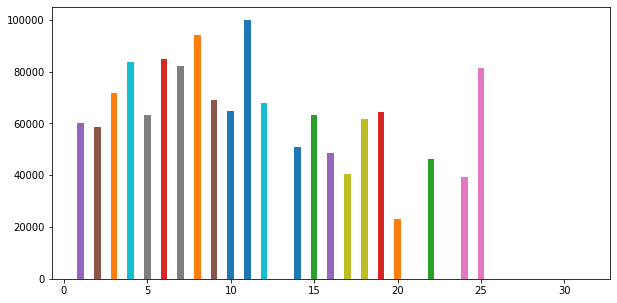

In [11]:
police_data_with_month

disctrict = {}

disct = police_data_with_month['District'].unique()

for d in disct:
    disctrict[d] = len(police_data_with_month[police_data_with_month['District'] == d].index)
    
for d in disct:
    plt.bar(d, disctrict[d], width = 0.4)

plt.show

In [12]:
test_df = police_data_with_month#[police_data_with_month['Year'] == 2016]
test_df

,Date,Primary Type,Arrest,Domestic,District,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Month,Timestamp
0,2016-05-03 23:40:00,BATTERY,True,True,10.0,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,5,1.462234e+09
1,2016-05-03 21:40:00,BATTERY,False,True,3.0,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,5,1.462234e+09
2,2016-05-03 23:31:00,PUBLIC PEACE VIOLATION,False,False,15.0,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,5,1.462234e+09
3,2016-05-03 22:10:00,BATTERY,False,False,15.0,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,5,1.462234e+09
4,2016-05-03 22:00:00,THEFT,False,True,15.0,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,5,1.462234e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456709,2016-05-03 23:33:00,BATTERY,True,True,10.0,1159105.0,1888300.0,2016,05/10/2016 03:56:50 PM,41.849222,-87.691556,5,1.462234e+09
1456710,2016-05-03 23:30:00,CRIMINAL DAMAGE,True,True,7.0,1175230.0,1856183.0,2016,05/10/2016 03:56:50 PM,41.760744,-87.633335,5,1.462234e+09
1456711,2016-05-03 00:15:00,BATTERY,False,False,8.0,1161027.0,1862810.0,2016,05/10/2016 03:56:50 PM,41.779235,-87.685207,5,1.462234e+09
1456712,2016-05-03 21:07:00,BATTERY,False,True,4.0,1197261.0,1850727.0,2016,05/10/2016 03:56:50 PM,41.745252,-87.552773,5,1.462234e+09


In [13]:
test_df = test_df[['Timestamp', 'District', 'Primary Type']]

# lets examine the primary types - non-Parametric values nominal
test_df['Primary Type'].value_counts()

THEFT                                322433
BATTERY                              258945
CRIMINAL DAMAGE                      152817
NARCOTICS                            131183
ASSAULT                               89512
OTHER OFFENSE                         85362
BURGLARY                              81673
DECEPTIVE PRACTICE                    68356
MOTOR VEHICLE THEFT                   59858
ROBBERY                               56096
CRIMINAL TRESPASS                     36432
WEAPONS VIOLATION                     16983
PUBLIC PEACE VIOLATION                13015
OFFENSE INVOLVING CHILDREN            10591
PROSTITUTION                           7567
CRIM SEXUAL ASSAULT                    6298
INTERFERENCE WITH PUBLIC OFFICER       6136
SEX OFFENSE                            4491
HOMICIDE                               2590
GAMBLING                               2211
ARSON                                  2175
LIQUOR LAW VIOLATION                   1928
KIDNAPPING                      

In [14]:
# lets examine the districts - non-parametric values nominal
test_df['District'].value_counts() 

11.0    99977
8.0     94244
6.0     84718
4.0     83590
7.0     82129
25.0    81310
3.0     71575
9.0     69173
12.0    67733
10.0    64744
19.0    64345
5.0     63417
15.0    63155
18.0    61892
1.0     60288
2.0     58717
14.0    51030
16.0    48534
22.0    46248
17.0    40359
24.0    39295
20.0    23130
31.0       26
13.0        1
Name: District, dtype: int64

In [15]:
test_df['Timestamp'].value_counts()

1.325376e+09    1333
1.338509e+09    1185
1.341101e+09    1166
1.356998e+09    1159
1.367366e+09    1135
                ... 
1.483747e+09       1
1.483661e+09       1
1.483574e+09       1
1.484179e+09       1
1.484611e+09       1
Name: Timestamp, Length: 1842, dtype: int64

In [16]:
test_df = test_df.groupby(['Timestamp', 'District'],
                          as_index=False).agg({"Primary Type": "count"})
test_df.rename(
    columns={'Primary Type': 'Crime Count'}, inplace=True)
test_df.head()


,Timestamp,District,Crime Count
0,1.325376e+09,1.0,40
1,1.325376e+09,2.0,42
2,1.325376e+09,3.0,56
3,1.325376e+09,4.0,89
4,1.325376e+09,5.0,47


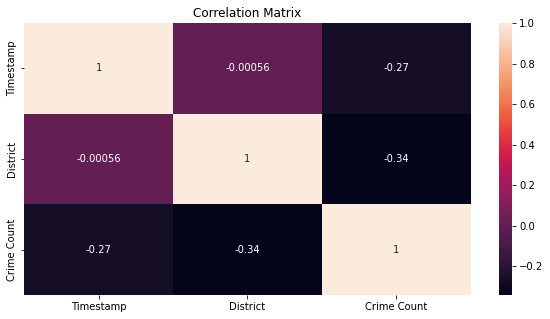

In [17]:
import seaborn as sn

corrMatrix = test_df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.title('Correlation Matrix')
plt.show()
# Hmm seems we do not have any correletaion :D

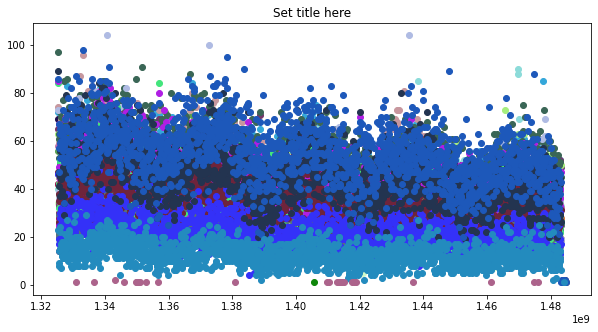

In [18]:
# See the data points
import random

for d in disct:
    color = (random.random(), random.random(), random.random())
    time = test_df[test_df['District'] == d]
    crimes = test_df[test_df['District'] == d]
    plt.plot(time['Timestamp'], crimes['Crime Count'], 'o', color=color, label=d)
plt.title('Set title here')
plt.show()

### Feature Engineering: Add District Crime Status

In [19]:
print(test_df.describe())

# The mean for the Crime Count is 35, we can classify that as low crime rate so 2 will be the threshold

def classify_crime(x):
    if (x <= 35):
        return 0
    elif(x > 35 and x < 70):
        return 1
    elif(x >= 70 and x <=104):
        return 2


test_df['status'] = test_df['Crime Count'].apply(classify_crime)
test_df = test_df[['Timestamp','District','Crime Count','status']]

test_df
test_df['status'].value_counts()

          Timestamp      District   Crime Count
count  4.024500e+04  40245.000000  40245.000000
mean   1.404303e+09     12.192769     35.274693
std    4.559763e+07      7.151137     13.518694
min    1.325376e+09      1.000000      1.000000
25%    1.364774e+09      6.000000     26.000000
50%    1.404346e+09     12.000000     34.000000
75%    1.443744e+09     18.000000     44.000000
max    1.484698e+09     31.000000    104.000000


0    21615
1    18170
2      460
Name: status, dtype: int64

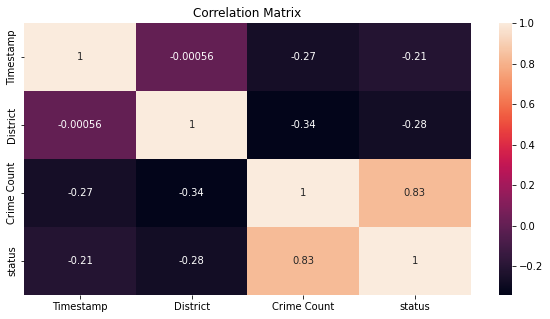

In [20]:
corrMatrix = test_df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

## ML Models training

### Split Series in 60% train set, 20% test set and 20% validation

We are splitting the sets in chronological order, leaving the latest data as the unseen validation set, becuase the goal of our models is to predict furute values (extrapolation).


In [21]:
# Split training/validation set and final test set
set_size = len(test_df)
train_size = int(set_size * 0.6)
test_size = int(set_size * 0.2)
train_series, validation_series, test_series = test_df[0:train_size], test_df[
    train_size:train_size+test_size], test_df[train_size+test_size:]

print(f'Size of Training set: {train_series.shape}')
print(f'Size of Validation set: {validation_series.shape}')
print(f'Size of Testing set: {test_series.shape}')


Size of Training set: (24147, 4)
Size of Validation set: (8049, 4)
Size of Testing set: (8049, 4)


### Decision Trees for classification

- Code Examples: https://www.kaggle.com/code/gauravduttakiit/hyperparameter-tuning-in-decision-trees/notebook
- Hyperparameters explication: https://towardsdatascience.com/how-to-tune-a-decision-tree-f03721801680


#### Prepare train/validation/test independent and dependent variables for Decision Tree Classifier

Decision trees and ensemble methods do not require feature scaling to be performed as they are not sensitive to the the variance in the data.


In [22]:
from sklearn.model_selection import PredefinedSplit


# Separete independent (X) and independent (y) variables for each set

# Independent
X_train = train_series[['Timestamp', 'District']]
X_validation = validation_series[['Timestamp', 'District']]
X_test = test_series[['Timestamp', 'District']]

# Dependent
y_train = train_series['status']
y_validation = validation_series['status']
y_test = test_series['status']


# For Tuning the model
# we need to provide a single training/validation dataset (X,y)
# and a PredefinedSplit object that splits the train and validation indexes
# values with index -1 belong always to the train set
# values with index 0 belong to the validation set
split_index = [-1]*len(X_train) + [0]*len(X_validation)
X = pd.concat((X_train, X_validation), axis=0)
y = pd.concat((y_train, y_validation), axis=0)
pds = PredefinedSplit(test_fold=split_index)


print(f'Size of Training set X: {X_train.shape}')
print(f'Size of Training set Y: {y_train.shape}')
print(f'Size of Validation set X: {X_validation.shape}')
print(f'Size of Validation set Y: {y_validation.shape}')
print(f'Size of Testing set X: {X_test.shape}')
print(f'Size of Testing set Y: {y_test.shape}')
print(f'Size of Cross Validation set X: {X.shape}')
print(f'Size of Cross Validation set Y: {y.shape}')

Size of Training set X: (24147, 2)
Size of Training set Y: (24147,)
Size of Validation set X: (8049, 2)
Size of Validation set Y: (8049,)
Size of Testing set X: (8049, 2)
Size of Testing set Y: (8049,)
Size of Cross Validation set X: (32196, 2)
Size of Cross Validation set Y: (32196,)


#### Run once so that we get used with the model, consider this a proof of concept for our set


In [23]:
# Using Decision Trees for classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

# Creating tree
d_tree = DecisionTreeClassifier(random_state=10)
# Fitting tree
d_tree = d_tree.fit(X, y)
# Predicting !
y_test_pred = d_tree.predict(X_test)

# Model Evaluation
# print(y_test)
# print(y_test_pred)
print("Accuracy:", (metrics.accuracy_score(y_test, y_test_pred)*100), "\n")

print(y_test.shape)
print(y_test_pred.shape
      )  # Confusion Matrix for evaluating the model
cm = pd.crosstab(y_test, y_test_pred, rownames=[
                 'Actual Alarm'], colnames=['Predicted Alarm'])
print("\n----------Confusion Matrix------------------------------------")
print(cm)

# Classification Report
print("\n----------Classification Report------------------------------------")
print(classification_report(y_test, y_test_pred))


# # Unweighted Average Recall
# print("\nUAR ->", ((cm[0][0])/(cm[0][0]+cm[1][0]+cm[2][0])+(cm[1][1]) /
#       (cm[0][1]+cm[1][1]+cm[2][1])+(cm[2][2])/(cm[2][2]+cm[0][2]+cm[1][2])))


Accuracy: 66.82817741334327 

(8049,)
(8049,)

----------Confusion Matrix------------------------------------
Predicted Alarm     0    1
Actual Alarm              
0                4610  696
1                1962  769
2                   6    6

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.70      0.87      0.78      5306
           1       0.52      0.28      0.37      2731
           2       0.00      0.00      0.00        12

    accuracy                           0.67      8049
   macro avg       0.41      0.38      0.38      8049
weighted avg       0.64      0.67      0.64      8049



/home/stefanos/kea/aai/chicago_project/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/stefanos/kea/aai/chicago_project/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/stefanos/kea/aai/chicago_project/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

#### Hyperparameter training of Decision Tree using Grid Search


In [24]:
from sklearn.model_selection import PredefinedSplit, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import tree

params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

d_tree = DecisionTreeClassifier(random_state=42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=d_tree,
                           param_grid=params,
                           cv=pds,
                           n_jobs=-1, verbose=1, scoring="accuracy")


grid_search.fit(X, y)

# Report results

dt_best = grid_search.best_estimator_

print(f'Best Estimator: \n{dt_best}')

score_df = pd.DataFrame(grid_search.cv_results_)
print(f'Top CV Results: \n{score_df.head()}')

print(
    f'Largest 5 Mean test score: \n{score_df.nlargest(5, "mean_test_score")}')


Fitting 1 folds for each of 50 candidates, totalling 50 fits
Best Estimator: 
DecisionTreeClassifier(max_depth=20, min_samples_leaf=20, random_state=42)
Top CV Results: 
   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.057214           0.0         0.004213             0.0   
1       0.032287           0.0         0.003922             0.0   
2       0.038067           0.0         0.012514             0.0   
3       0.028466           0.0         0.004031             0.0   
4       0.027832           0.0         0.003838             0.0   

  param_criterion param_max_depth param_min_samples_leaf  \
0            gini               2                      5   
1            gini               2                     10   
2            gini               2                     20   
3            gini               2                     50   
4            gini               2                    100   

                                              params  split0_test_

#### Use the tuned model and test it on unseen data

Train Accuracy : 0.831345508758852
Train Confusion Matrix:
[[13998  2311     0]
 [ 2671 12768     0]
 [    5   443     0]]
--------------------------------------------------
Test Accuracy : 0.7459311715741086
Test Confusion Matrix:
[[4926  380    0]
 [1653 1078    0]
 [   1   11    0]]


/home/stefanos/kea/aai/chicago_project/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/stefanos/kea/aai/chicago_project/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/stefanos/kea/aai/chicago_project/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

              precision    recall  f1-score   support

           0       0.75      0.93      0.83      5306
           1       0.73      0.39      0.51      2731
           2       0.00      0.00      0.00        12

    accuracy                           0.75      8049
   macro avg       0.49      0.44      0.45      8049
weighted avg       0.74      0.75      0.72      8049



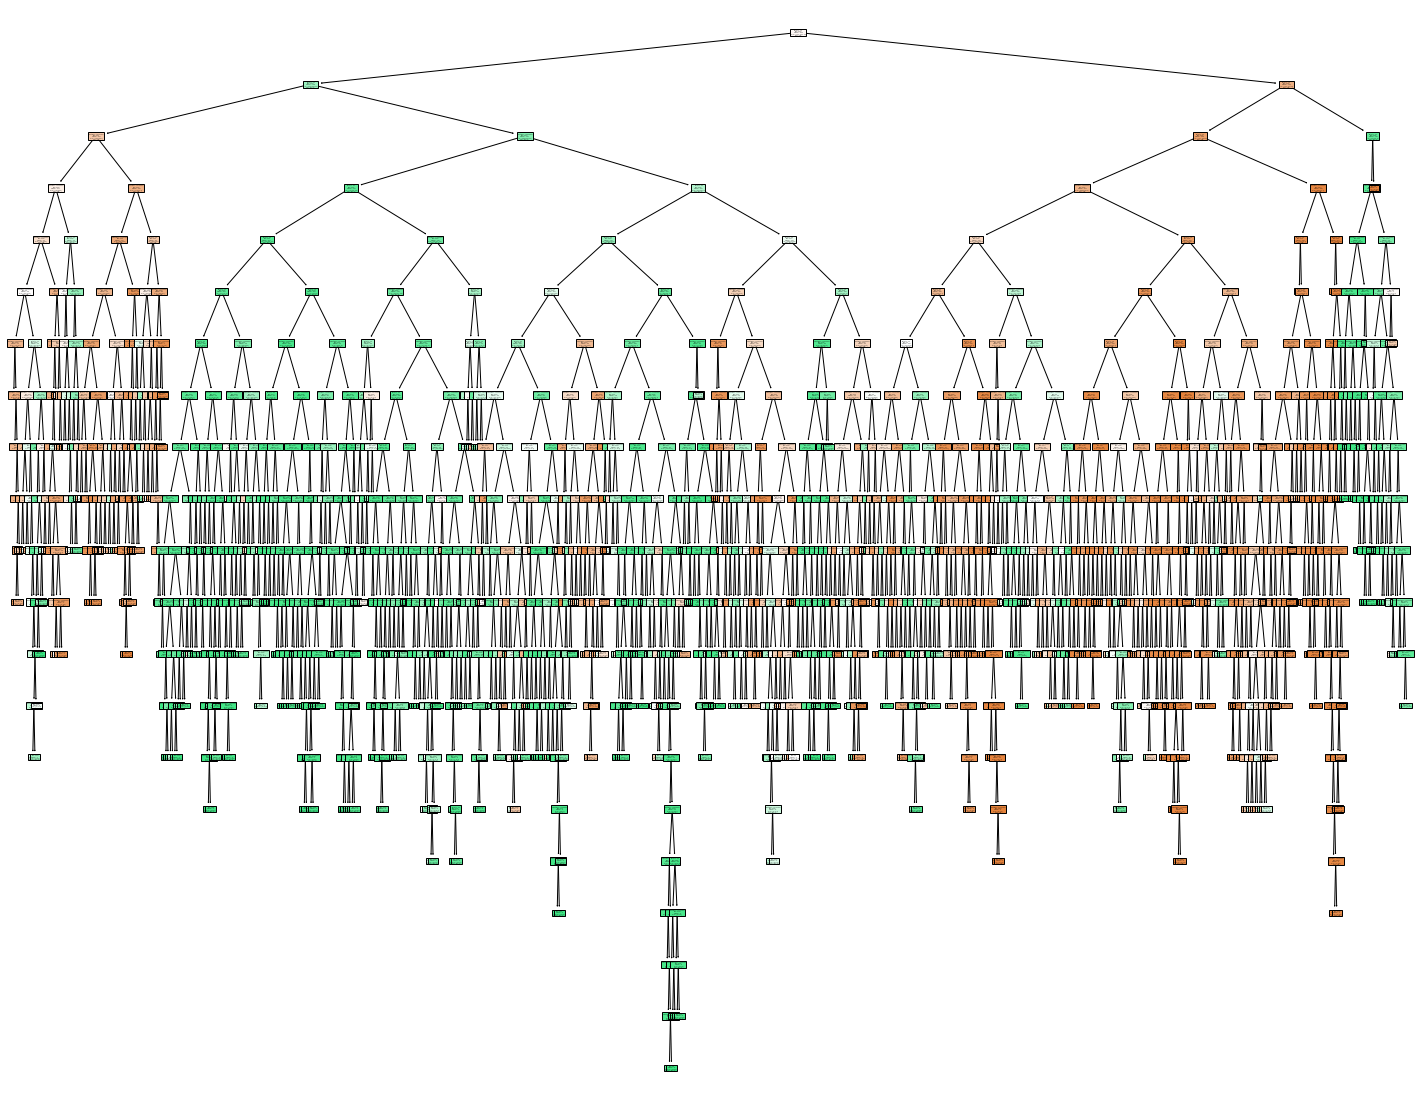

In [25]:

def evaluate_model(dt_classifier, X_train_validation_set, y_train_validation_set, X_test_set, y_test_set):
    y_train_valid_predict = dt_classifier.predict(X_train_validation_set)
    y_test_predict = dt_classifier.predict(X_test_set)
    print("Train Accuracy :", accuracy_score(
        y_train_validation_set, y_train_valid_predict))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train_validation_set, y_train_valid_predict))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(
        y_test_set, y_test_predict))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test_set, y_test_predict))


evaluate_model(dt_best, X, y, X_test, y_test)


def get_dt_graph(dt_classifier):
    fig = plt.figure(figsize=(25, 20))
    _ = tree.plot_tree(dt_classifier,
                       feature_names=X.columns,
                       class_names=['Low', "Medium", "High"],
                       filled=True)


get_dt_graph(dt_best)

print(classification_report(y_test, dt_best.predict(X_test)))


#### Decision Tree Results: The model is overfitted

- Train Accuracy : 0.831345508758852
- Test Accuracy : 0.7459311715741086

We can see that the model performs better on the training data than the testing unseen data. The model has overfitted to the noise of the training data, missing the important parameters, so the accuracy is lower on unseen data.

Source about decision tree overfitting and how to combat it: https://towardsdatascience.com/3-techniques-to-avoid-overfitting-of-decision-trees-1e7d3d985a09


In [26]:
from sklearn.linear_model import SGDClassifier

sgdc = SGDClassifier(loss="hinge", penalty="l2", max_iter=100_000_000)

sgdc.fit(X_train, y_train)

predictions = sgdc.predict(X_test)

print("Accuracy:",(metrics.accuracy_score(y_test, predictions)*100),"\n")

# Confusion Matrix for evaluating the model
cm = pd.crosstab(y_test, predictions, rownames=['Actual Alarm'], colnames=['Predicted Alarm'])
print("\n----------Confusion Matrix------------------------------------")
print(cm)

# Classification Report
print("\n----------Classification Report------------------------------------")
print(classification_report(y_test, predictions))

# Unweighted Average Recall
#print("\nUAR ->",((cm[0][0])/(cm[0][0]+cm[1][0]+cm[2][0])+(cm[1][1])/(cm[0][1]+cm[1][1]+cm[2][1])+(cm[2][2])/(cm[2][2]+cm[0][2]+cm[1][2])))


Accuracy: 33.929680705677725 


----------Confusion Matrix------------------------------------
Predicted Alarm     1
Actual Alarm         
0                5306
1                2731
2                  12

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      5306
           1       0.34      1.00      0.51      2731
           2       0.00      0.00      0.00        12

    accuracy                           0.34      8049
   macro avg       0.11      0.33      0.17      8049
weighted avg       0.12      0.34      0.17      8049



/home/anton/Documents/Project_Repositories/chicago_project/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/anton/Documents/Project_Repositories/chicago_project/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/anton/Documents/Project_Repositories/chicago_project/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_div

In [27]:
from sklearn import svm

clf = svm.SVC(decision_function_shape='ovo')

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy:",(metrics.accuracy_score(y_test, y_pred)*100),"\n")

# Confusion Matrix for evaluating the model
cm = pd.crosstab(y_test, y_pred, rownames=['Actual Alarm'], colnames=['Predicted Alarm'])
print("\n----------Confusion Matrix------------------------------------")
print(cm)

# Classification Report
print("\n----------Classification Report------------------------------------")
print(classification_report(y_test, y_pred))


Accuracy: 65.92123245123618 


----------Confusion Matrix------------------------------------
Predicted Alarm     0
Actual Alarm         
0                5306
1                2731
2                  12

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.66      1.00      0.79      5306
           1       0.00      0.00      0.00      2731
           2       0.00      0.00      0.00        12

    accuracy                           0.66      8049
   macro avg       0.22      0.33      0.26      8049
weighted avg       0.43      0.66      0.52      8049



/home/anton/Documents/Project_Repositories/chicago_project/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/anton/Documents/Project_Repositories/chicago_project/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/anton/Documents/Project_Repositories/chicago_project/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_div

In [28]:

from sklearn import linear_model
from sklearn.metrics import r2_score

reg = linear_model.Ridge(alpha=.5)
X = test_df[['Timestamp', 'District']] # independent
y = test_df['Crime Count'] # dependent

# Let's split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1) # 75:25 split

reg.fit(X_train, y_train)

y_predic = reg.predict(X_test)

print(reg.score(X, y))



0.18740920987202658


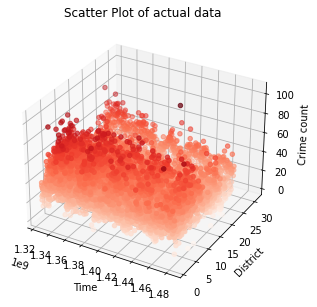

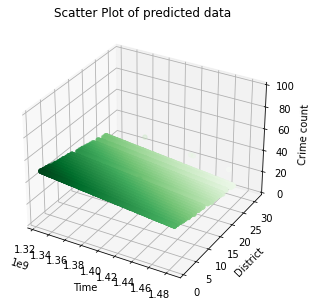

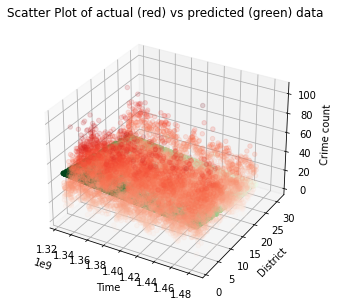

In [29]:


from mpl_toolkits import mplot3d


fig = plt.figure()
ax = plt.axes(projection='3d')
plt.title('Scatter Plot of actual data')
ax.set_xlabel('Time')
ax.set_ylabel('District')
ax.set_zlabel('Crime count')
ax.scatter3D(X_test['Timestamp'], X_test['District'],
             y_test, c=y_test, cmap='Reds')


fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_zlim([0, 100])
plt.title('Scatter Plot of predicted data')
ax.set_xlabel('Time')
ax.set_ylabel('District')
ax.set_zlabel('Crime count')
ax.scatter3D(X_test['Timestamp'], X_test['District'],
             y_predic, c=y_predic, cmap='Greens')

fig = plt.figure()
ax = plt.axes(projection='3d')
plt.title('Scatter Plot of actual (red) vs predicted (green) data')
ax.set_xlabel('Time')
ax.set_ylabel('District')
ax.set_zlabel('Crime count')
ax.scatter3D(X_test['Timestamp'], X_test['District'],
             y_predic, c=y_predic, cmap='Greens')
ax.scatter3D(X_test['Timestamp'], X_test['District'],
             y_test, c=y_test, cmap='Reds', alpha=0.15)
